# Logistic Regression Model to Predict Tool Wear Failures in A Milling Machine Based on Sensor Data

# Import Package dan Dataset

In [ ]:
# Import Needed package for Data Processing
import pandas as pd # Package untuk prosesing tabel
import numpy as np # Package untuk prosesing array
import matplotlib.pyplot as plt # Package untuk menampilkan graph

dataset_sensor_mesin = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQUTyOouX3_rDrty3AefkmvUbuUv0dW-ycbJvHBqt82LyRXdjG1nbar7MdEjRcC52HmufRVhkO1tQA_/pub?output=csv")

In [ ]:
dataset_sensor_mesin

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
columns_to_drop = ['UDI','Type','Product ID','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
dataset_sensor_mesin.drop(columns=columns_to_drop, axis=1, inplace=True)
dataset_sensor_mesin

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


# Cek Nilai Dataset

In [ ]:
dataset_sensor_mesin.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
dataset_sensor_mesin.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

# Membuat Model Logistic Regression

In [ ]:
# Import Model untuk prediksi Machine Failure

from sklearn.linear_model import LogisticRegression # Package for model logistic Regression
from sklearn import metrics # Package for metrics evaluation for Logistic Regression

In [ ]:
# Buat fungsi model Logistic Regression untuk memprediksi mesin yang rusak atau tidak

model_logistic_regression = LogisticRegression()

In [ ]:
# Buat dataset dan target untuk prediksi mesin yang rusak atau tidak

Y = dataset_sensor_mesin["Machine failure"].values.reshape(-1,1)
X = dataset_sensor_mesin.drop( ["Machine failure"], axis = 1).values.reshape(-1,5)

model_logistic_regression.fit( X, Y )


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Bikin prediksi model Logistic Regression untuk mesin yang rusak atau tidak

machine_failure_or_not = model_logistic_regression.predict( X )
machine_failure_or_not

array([0, 0, 0, ..., 0, 0, 0])

# Evaluasi Model Logistic Regression

In [ ]:
# Liat prediksi mesin rusak atau tidak

dataset_sensor_mesin_with_prediction = dataset_sensor_mesin.copy()

dataset_sensor_mesin_with_prediction[ "Machine_Failure_or_Not" ] = machine_failure_or_not # Tambahkan prediksi Model Logistic Regression Customer bayar loan or not ke dataset

dataset_sensor_mesin_with_prediction

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Machine_Failure_or_Not
0,298.1,308.6,1551,42.8,0,0,0
1,298.2,308.7,1408,46.3,3,0,0
2,298.1,308.5,1498,49.4,5,0,0
3,298.2,308.6,1433,39.5,7,0,0
4,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0
9996,298.9,308.4,1632,31.8,17,0,0
9997,299.0,308.6,1645,33.4,22,0,0
9998,299.0,308.7,1408,48.5,25,0,0


In [ ]:
# Kemudian cek akurasi dan F1 score dari prediksi model Logistic Regression untuk memprediksi mesin rusak or tidak
accuracy_model_logistic_regression = metrics.accuracy_score( Y , machine_failure_or_not )

print( "Accuracy model Logistic Regression Machine Failure or Not is : " + str( accuracy_model_logistic_regression ))

Accuracy model Logistic Regression Machine Failure or Not is : 0.9701


In [ ]:
F1_score_model_logistic_regression = metrics.f1_score( Y , machine_failure_or_not )

print( "F1 Score model Logistic Regression predict Machine Failure or Not is : " + str( F1_score_model_logistic_regression ))

F1 Score model Logistic Regression predict Machine Failure or Not is : 0.3219954648526077


In [ ]:
machine_failure_or_not.reshape( -1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
Y.shape

(10000, 1)

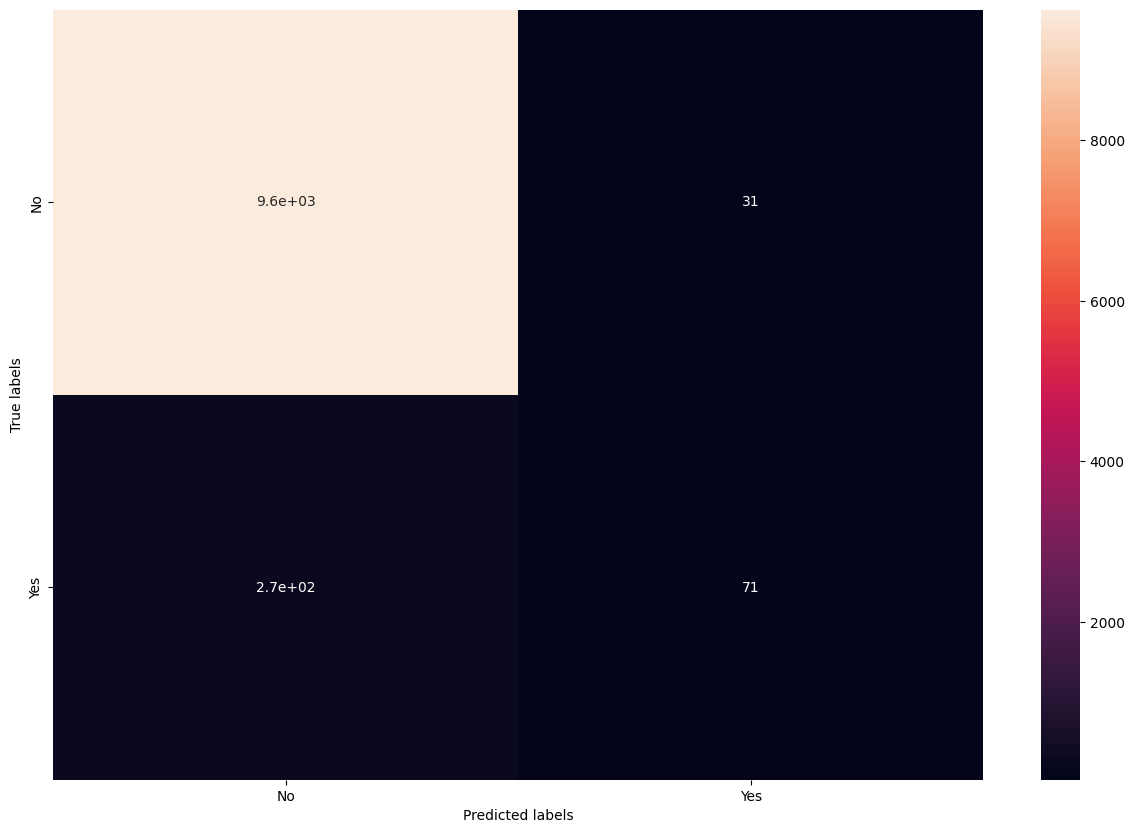

In [ ]:
# Kemudian bikin confusion matrix untuk evaluasi Model Logistic Regression Machine failure or not

# Plot confusion matrix
from sklearn.metrics import confusion_matrix # Package untuk visualisasi confusion matrix untuk memprediksi Machine failure or not
import seaborn as sns # Package to visualize confusion matrix memprediksi Machine failure or not

plt.figure(figsize= (15,10)) # Atur ukuran con

cm= confusion_matrix(Y, machine_failure_or_not , labels=[0,1]) # confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
#ax.set_title('Confusion Matrix '+ str(i));
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [ ]:
print( "Coefficient of Logistic Regression Model is : " + str( model_logistic_regression.coef_ ))

Coefficient of Logistic Regression Model is : [[ 0.82442246 -0.91068018  0.01141425  0.27815743  0.01323957]]


In [ ]:
# Create dataframe for feature importance of logistic regression

dict_importance_every_feature = { "Importance_Feature" : abs( model_logistic_regression.coef_[0]) } # Make dictionary with column "Importance Feature" to have feature importance of Logistic Regression Model

importance_every_feature_dataframe = pd.DataFrame( dict_importance_every_feature ) # Convert dictionary ke dataframe Pandas

# Tambahkan index datagram feature importance dengan nama kolom di dataset sensor mesin
importance_every_feature_dataframe.index = dataset_sensor_mesin.drop( "Machine failure" , axis = 1).columns

#plt.plot( model_logistic_regression.coef_[0].reshape(-1) , kind= "barh")
importance_every_feature_dataframe

,Importance_Feature
Air temperature [K],0.824422
Process temperature [K],0.910680
Rotational speed [rpm],0.011414
Torque [Nm],0.278157
Tool wear [min],0.013240


<Axes: >

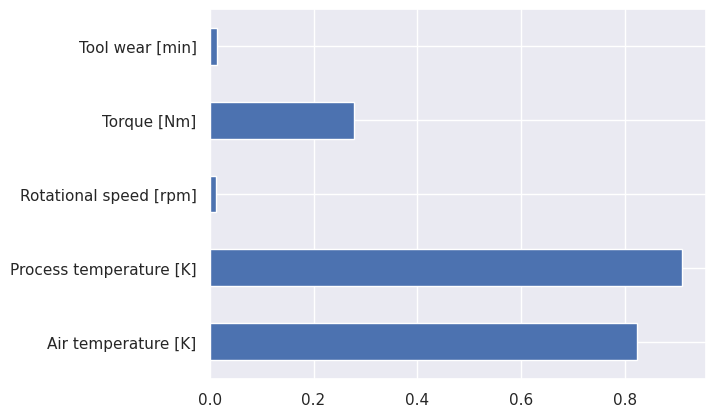

In [ ]:
sns.set_theme() # Function to make Feature Importance evaluation more beautiful

importance_every_feature_dataframe[ "Importance_Feature" ].plot( kind= "barh" )

# Belajar dari Youtube

# Preparation Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [ ]:
train, valid, test = np.split(dataset_sensor_mesin.sample(frac=1), [int(0.6*len(dataset_sensor_mesin)), int(0.8*len(dataset_sensor_mesin))]) # membagi dataset menjadi 6:2:2 untuk training, validation, dan test

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

NameError: name 'train' is not defined

In [ ]:
sum(y_train == 0)


5794

In [ ]:
sum(y_train ==1)

5794

# kNearestNeighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1930
           1       0.35      0.67      0.46        70

    accuracy                           0.95      2000
   macro avg       0.67      0.81      0.72      2000
weighted avg       0.97      0.95      0.95      2000



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1930
           1       0.16      0.76      0.27        70

    accuracy                           0.85      2000
   macro avg       0.58      0.81      0.59      2000
weighted avg       0.96      0.85      0.90      2000



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1930
           1       0.13      0.79      0.22        70

    accuracy                           0.81      2000
   macro avg       0.56      0.80      0.56      2000
weighted avg       0.96      0.81      0.87      2000



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1930
           1       0.23      0.87      0.36        70

    accuracy                           0.89      2000
   macro avg       0.61      0.88      0.65      2000
weighted avg       0.97      0.89      0.92      2000

